<a href="https://colab.research.google.com/github/ChiaraDeMartin95/ciao/blob/master/PionIDwithML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting the file for the training
 

In [226]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "PionID"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#save more than one plots in one pdf file
from matplotlib.backends.backend_pdf import PdfPages

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [227]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
path_to_dir='/content/gdrive/My\ Drive/FinalExamML/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [228]:
!ls /content/gdrive/My\ Drive/FianlExamML

ls: cannot access '/content/gdrive/My Drive/FianlExamML': No such file or directory


In [229]:
!pip install uproot 

In [230]:
import uproot

In [231]:
#filePion=uproot.open("/content/gdrive/My Drive/AnalysisResultsPionsMC.root")
#filePion=uproot.open("/content/gdrive/My Drive/AnalysisResults2018f1_extra_Pions_5runs.root")
filePion=uproot.open("/content/gdrive/My Drive/AnalysisResults2018f1_extra_500000Entries.root")

In [232]:
dirPion=filePion["MyTaskPions"]

In [233]:
treePion=dirPion["fSignalTree"]

In [234]:
treePion['fTreeVariableChargeTrigger'].array()

array([ 1,  1,  1, ..., -1, -1,  1], dtype=int32)

In [235]:
PandaPionDF=treePion.pandas.df(["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])
PandaPionDFTry1=treePion.pandas.df(["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])

In [236]:
VarNames=["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOFPion","fTreeVariableNSigmaTOFProton","fTreeVariableNSigmaTOFKaon", "fTreeVariableNSigmaTPCPion","fTreeVariableNSigmaTPCProton", "fTreeVariableNSigmaTPCKaon", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"]

In [237]:
FeatureNames=["NSigmaTOFPion","NSigmaTOFProton","NSigmaTOFKaon", "NSigmaTPCPion","NSigmaTPCProton", "NSigmaTPCKaon", "dEdX", "TOFBeta", "PtTrigger", "Ptot"]

In [238]:
XAxisNames=["NSigmaTOFPion","NSigmaTOFProton","NSigmaTOFKaon", "NSigmaTPCPion","NSigmaTPCProton", "NSigmaTPCKaon", "dEdX (arb.units)", "TOFBeta", "Pt (GeV/c)", "P (GeV/c)"]

In [239]:
ClassNames=["IsNotPion", "IsPion"]

In [240]:
PandaPionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555008 entries, 0 to 555007
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fTreeVariablePDGCodeTrigger   555008 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    555008 non-null  float64
 2   fTreeVariableNSigmaTOFProton  555008 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    555008 non-null  float64
 4   fTreeVariableNSigmaTPCPion    555008 non-null  float64
 5   fTreeVariableNSigmaTPCProton  555008 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    555008 non-null  float64
 7   fTreeVariabledEdX             555008 non-null  float64
 8   fTreeVariableTOFBeta          555008 non-null  float64
 9   fTreeVariablePtTrigger        555008 non-null  float64
 10  fTreeVariablePtot             555008 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 44.5 MB


In [241]:
PandaPionDF.describe()

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
count,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000
mean,5.524825,-693.605913,-704.123312,-700.576958,1.014065,-10.999834,-5.762849,55.662875,-695.706619,0.682154,0.790477
std,490.891343,465.953345,447.698134,454.181614,13.871344,12.722476,13.315220,24.577844,459.668068,0.595334,0.848561
min,-2212.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.132270,0.117377
25%,-211.000000,-999.000000,-999.000000,-999.000000,-0.687420,-15.625990,-11.747032,48.500000,-999.000000,0.326099,0.364880
50%,11.000000,-999.000000,-999.000000,-999.000000,0.058043,-13.305474,-5.553878,51.312500,-999.000000,0.511555,0.583517
75%,211.000000,-0.877112,-36.241206,-33.624281,0.851033,-6.860306,-0.390163,55.437500,0.948506,0.822685,0.955412
max,2212.000000,4237.723145,4163.901855,4211.251953,344.927277,13.756308,56.087368,1343.000000,1.357131,23.890995,307.870361


In [242]:
PandaPionDF.head()

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
entry,,,,,,,,,,,
0,211,0.822866,-35.558510,-20.614727,-0.160548,-12.038261,-3.123701,50.31250,0.977118,0.680152,0.780761
1,211,-999.000000,-999.000000,-999.000000,-0.731575,-16.979609,-15.460593,57.09375,-999.000000,0.265325,0.307151
2,211,-999.000000,-999.000000,-999.000000,-1.659945,-16.068172,-15.458352,53.15625,-999.000000,0.270509,0.276320
3,-211,0.505608,-31.459002,-33.033234,0.317079,-16.222807,-8.096101,51.81250,0.956241,0.501138,0.492117
4,211,-999.000000,-999.000000,-999.000000,0.082321,-14.982376,-15.453801,59.18750,-999.000000,0.243150,0.238066


In [243]:
PandaPionDF["fTreeVariablePDGCodeTrigger"].value_counts()

 211     240631
-211     240384
 321      19136
-321      18284
 2212     11705
-2212     10467
 11        5156
-11        4861
-13        2230
 13        2154
Name: fTreeVariablePDGCodeTrigger, dtype: int64

In [244]:
PandaPionDF["fTreeVariableNSigmaTOFPion"].value_counts()

-999.000000    386671
-0.485679           2
-0.538003           2
-1.124747           2
-0.347356           2
                ...  
-0.320736           1
 1.282937           1
 1.282931           1
-1.282900           1
 0.500001           1
Name: fTreeVariableNSigmaTOFPion, Length: 168196, dtype: int64

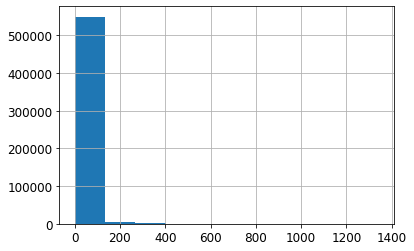

In [245]:
PandaPionDF["fTreeVariabledEdX"].hist()

Saving figure /content/gdrive/My Drive/FinalExamML/attributes_histogram_plots


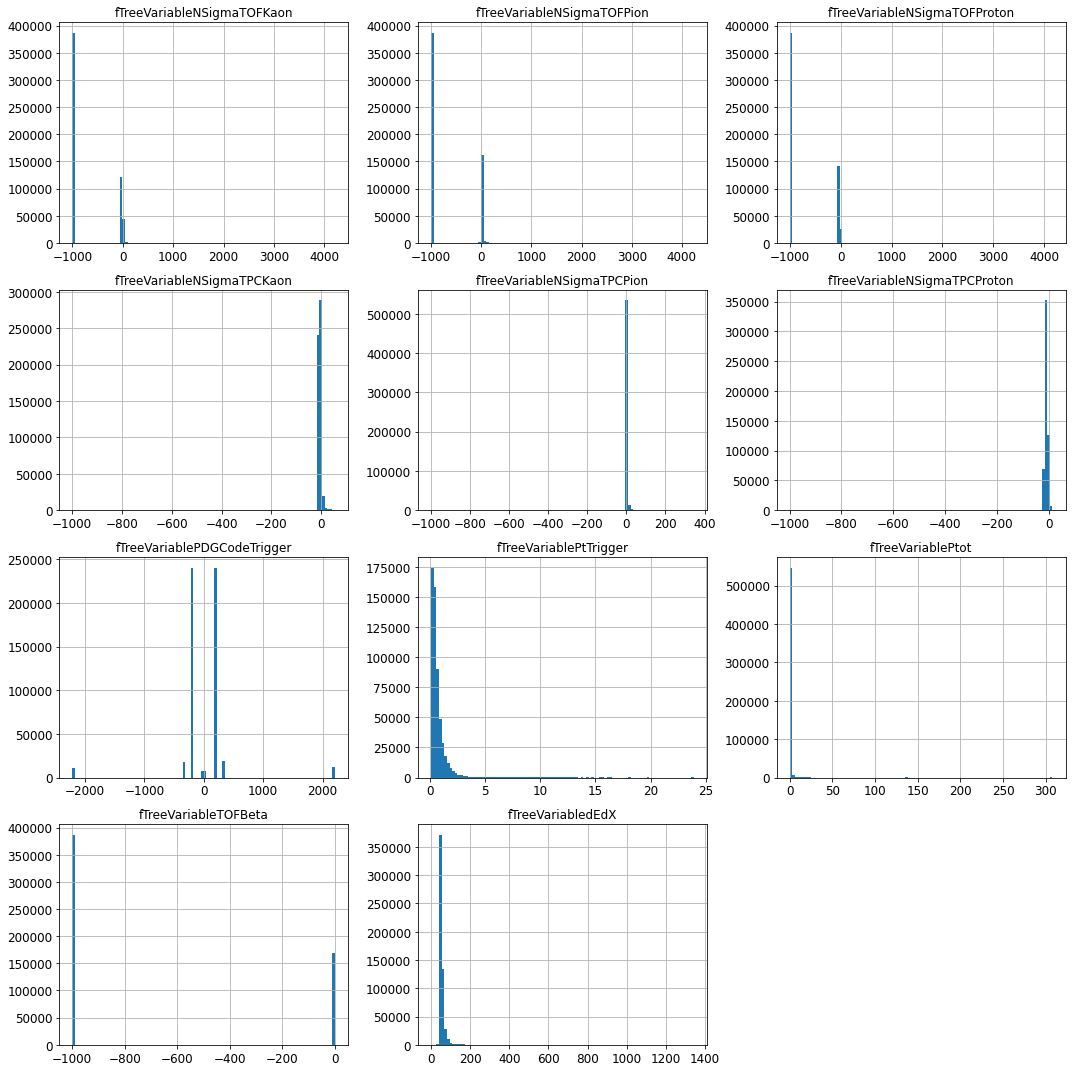

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
PandaPionDF.hist(bins=100, figsize=(15,15))
save_fig("/content/gdrive/My Drive/FinalExamML/attributes_histogram_plots")
plt.show()

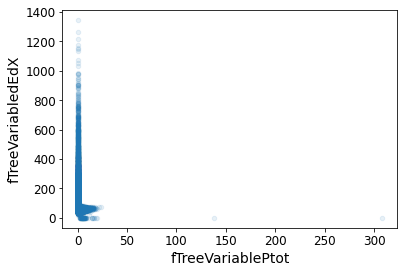

In [247]:
PandaPionDF.plot(kind="scatter", x="fTreeVariablePtot", y="fTreeVariabledEdX", alpha=0.1)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


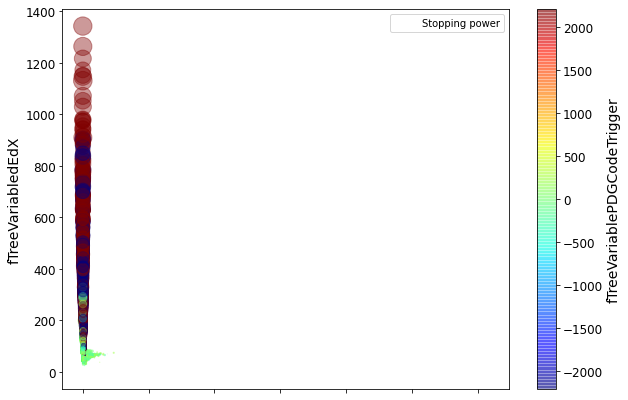

In [248]:
PandaPionDF.plot(kind="scatter", x="fTreeVariablePtot", y="fTreeVariabledEdX", alpha=0.4,
    s=PandaPionDF["fTreeVariableNSigmaTPCPion"], label="Stopping power", figsize=(10,7),
    c="fTreeVariablePDGCodeTrigger", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
#save_fig("/content/gdrive/My Drive/Hands-on/housing_prices_scatterplot")

##Signal and background dataframes


In [249]:
PandaPionDF_sigPlus=PandaPionDF[PandaPionDF.fTreeVariablePDGCodeTrigger==211]
PandaPionDF_sigMinus=PandaPionDF[PandaPionDF.fTreeVariablePDGCodeTrigger==-211]
PandaPionDF_sigtot=PandaPionDF[(PandaPionDF.fTreeVariablePDGCodeTrigger==211) | (PandaPionDF.fTreeVariablePDGCodeTrigger==-211) ]
PandaPionDF_bkgtot=PandaPionDF[(PandaPionDF.fTreeVariablePDGCodeTrigger!=211) & (PandaPionDF.fTreeVariablePDGCodeTrigger!=-211) ]
#PandaPionDF_sigPlus.info()
#PandaPionDF_sigMinus.info()
PandaPionDF_sigtot.info()
PandaPionDF_bkgtot.info()
PandaPionDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481015 entries, 0 to 555007
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fTreeVariablePDGCodeTrigger   481015 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    481015 non-null  float64
 2   fTreeVariableNSigmaTOFProton  481015 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    481015 non-null  float64
 4   fTreeVariableNSigmaTPCPion    481015 non-null  float64
 5   fTreeVariableNSigmaTPCProton  481015 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    481015 non-null  float64
 7   fTreeVariabledEdX             481015 non-null  float64
 8   fTreeVariableTOFBeta          481015 non-null  float64
 9   fTreeVariablePtTrigger        481015 non-null  float64
 10  fTreeVariablePtot             481015 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 42.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73993 e

In [250]:
PandaPionDF.describe()

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
count,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000
mean,5.524825,-693.605913,-704.123312,-700.576958,1.014065,-10.999834,-5.762849,55.662875,-695.706619,0.682154,0.790477
std,490.891343,465.953345,447.698134,454.181614,13.871344,12.722476,13.315220,24.577844,459.668068,0.595334,0.848561
min,-2212.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.132270,0.117377
25%,-211.000000,-999.000000,-999.000000,-999.000000,-0.687420,-15.625990,-11.747032,48.500000,-999.000000,0.326099,0.364880
50%,11.000000,-999.000000,-999.000000,-999.000000,0.058043,-13.305474,-5.553878,51.312500,-999.000000,0.511555,0.583517
75%,211.000000,-0.877112,-36.241206,-33.624281,0.851033,-6.860306,-0.390163,55.437500,0.948506,0.822685,0.955412
max,2212.000000,4237.723145,4163.901855,4211.251953,344.927277,13.756308,56.087368,1343.000000,1.357131,23.890995,307.870361


In [251]:
def SigBkgPtBins(PtMin, PtMax, PandaPionDF):
  PandaPionDF_sigtot=PandaPionDF[((PandaPionDF.fTreeVariablePDGCodeTrigger==211) | (PandaPionDF.fTreeVariablePDGCodeTrigger==-211)) & (PandaPionDF.fTreeVariablePtTrigger>PtMin) & (PandaPionDF.fTreeVariablePtTrigger<PtMax)]
  PandaPionDF_bkgtot=PandaPionDF[(PandaPionDF.fTreeVariablePDGCodeTrigger!=211) & (PandaPionDF.fTreeVariablePDGCodeTrigger!=-211) & (PandaPionDF.fTreeVariablePtTrigger>PtMin) & (PandaPionDF.fTreeVariablePtTrigger<PtMax)]
  return PandaPionDF_sigtot, PandaPionDF_bkgtot

In [252]:
PandaPionDF_sigtotLowPt, PandaPionDF_bkgtotLowPt = SigBkgPtBins(0.5, 1, PandaPionDF)
PandaPionDF_bkgtotLowPt.info()
PandaPionDF_sigtotLowPt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26745 entries, 24 to 554979
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariablePDGCodeTrigger   26745 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    26745 non-null  float64
 2   fTreeVariableNSigmaTOFProton  26745 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    26745 non-null  float64
 4   fTreeVariableNSigmaTPCPion    26745 non-null  float64
 5   fTreeVariableNSigmaTPCProton  26745 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    26745 non-null  float64
 7   fTreeVariabledEdX             26745 non-null  float64
 8   fTreeVariableTOFBeta          26745 non-null  float64
 9   fTreeVariablePtTrigger        26745 non-null  float64
 10  fTreeVariablePtot             26745 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 2.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 160198 entries, 0 to 

In [253]:
PandaPionDF_sigtotMidPt, PandaPionDF_bkgtotMidPt = SigBkgPtBins(1, 3, PandaPionDF)
PandaPionDF_bkgtotMidPt.info()
PandaPionDF_sigtotMidPt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24096 entries, 42 to 554962
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariablePDGCodeTrigger   24096 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    24096 non-null  float64
 2   fTreeVariableNSigmaTOFProton  24096 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    24096 non-null  float64
 4   fTreeVariableNSigmaTPCPion    24096 non-null  float64
 5   fTreeVariableNSigmaTPCProton  24096 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    24096 non-null  float64
 7   fTreeVariabledEdX             24096 non-null  float64
 8   fTreeVariableTOFBeta          24096 non-null  float64
 9   fTreeVariablePtTrigger        24096 non-null  float64
 10  fTreeVariablePtot             24096 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 2.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68736 entries, 9 to 5

In [254]:
PandaPionDF_sigtotHighPt, PandaPionDF_bkgtotHighPt = SigBkgPtBins(3, 4, PandaPionDF)
PandaPionDF_bkgtotHighPt.info()
PandaPionDF_sigtotHighPt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 344 to 554264
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fTreeVariablePDGCodeTrigger   1188 non-null   int32  
 1   fTreeVariableNSigmaTOFPion    1188 non-null   float64
 2   fTreeVariableNSigmaTOFProton  1188 non-null   float64
 3   fTreeVariableNSigmaTOFKaon    1188 non-null   float64
 4   fTreeVariableNSigmaTPCPion    1188 non-null   float64
 5   fTreeVariableNSigmaTPCProton  1188 non-null   float64
 6   fTreeVariableNSigmaTPCKaon    1188 non-null   float64
 7   fTreeVariabledEdX             1188 non-null   float64
 8   fTreeVariableTOFBeta          1188 non-null   float64
 9   fTreeVariablePtTrigger        1188 non-null   float64
 10  fTreeVariablePtot             1188 non-null   float64
dtypes: float64(10), int32(1)
memory usage: 106.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 237 t

In [255]:
VarRangeMin=[-3000, -10,-10,-10, -10,-10, -10, 0, -100, 0, 0, 0]
x=-1
n=5
for var in range(n):
 x+=1
 print(VarRangeMin[x])


-3000
-10
-10
-10
-10


fTreeVariableNSigmaTOFPion
-50


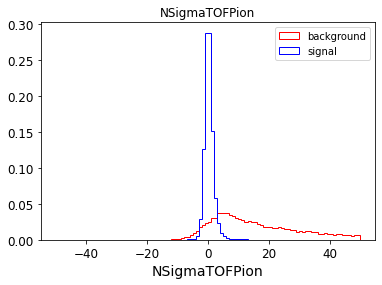

fTreeVariableNSigmaTOFProton
-50


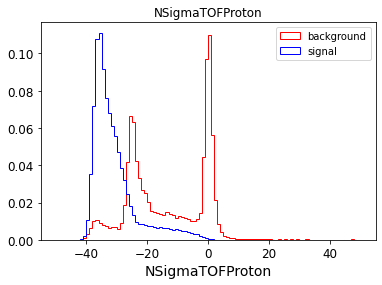

fTreeVariableNSigmaTOFKaon
-50


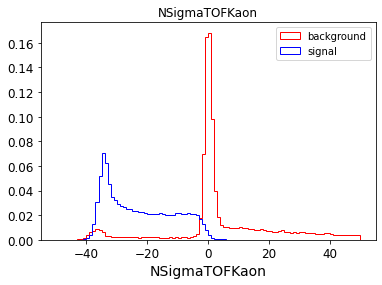

fTreeVariableNSigmaTPCPion
-50


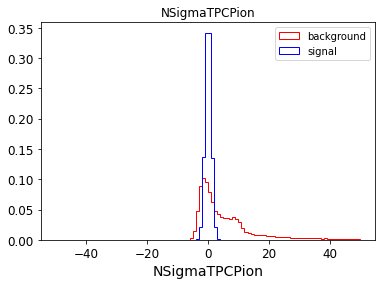

fTreeVariableNSigmaTPCProton
-50


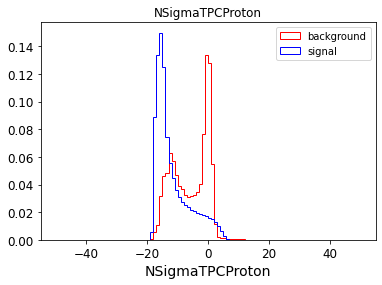

fTreeVariableNSigmaTPCKaon
-10


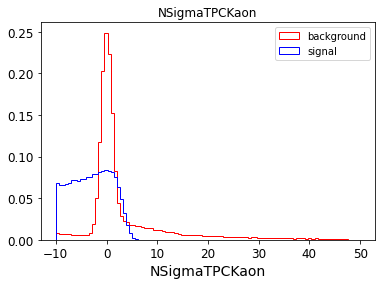

fTreeVariabledEdX
0


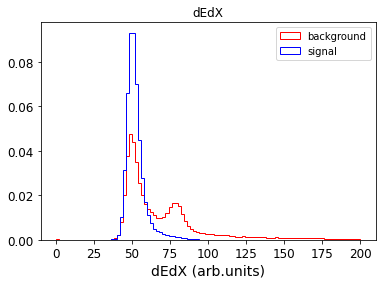

fTreeVariableTOFBeta
0


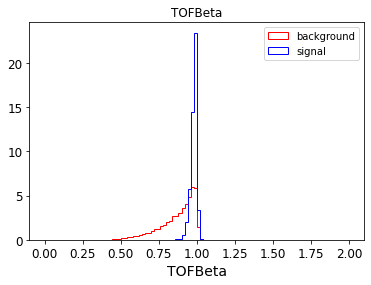

fTreeVariablePtTrigger
0


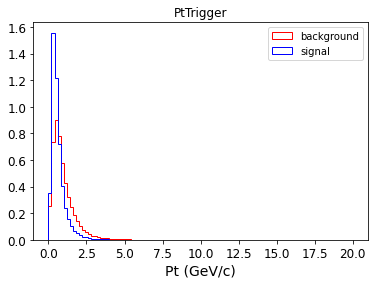

fTreeVariablePtot
0


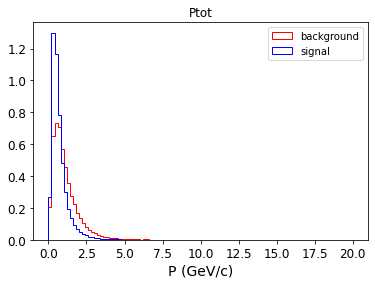

In [256]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#save more than one plots in one pdf file
from matplotlib.backends.backend_pdf import PdfPages

VarRangeMin=[-50,-50,-50, -50,-50, -10, 0, 0, 0, 0, 0]
VarRangeMax=[50,50,50, 50,50, 50, 200, 2, 20, 20, 5]
#VarRangeMin=-50
x=-1
pp = PdfPages('/content/gdrive/My Drive/FinalExamML/SigBkgDiff.pdf')
for var in VarNames[1:]: #this VarNames[1:] is a way to skip the first variable which is the true label
    x+=1
    print(var)
    print(VarRangeMin[x])
    plt.figure()
    plt.hist(np.array(PandaPionDF_bkgtot[var]),bins=100,range=(VarRangeMin[x],VarRangeMax[x]),histtype="step", color="red",label="background", density=True)
    plt.hist(np.array(PandaPionDF_sigtot[var]),bins=100,range=(VarRangeMin[x],VarRangeMax[x]),histtype="step", color="blue", label="signal", density=True)
    plt.legend(loc='upper right')
    plt.title(FeatureNames[x])
    plt.xlabel(XAxisNames[x])
    plt.show()
    fig = plt.figure(figsize=(4, 5)) 
    #save_fig("/content/gdrive/My Drive/FinalExamML/SigBkgDifferences")
    pp.savefig(fig)
    plt.close()
pp.close()

#Question: how to normalise the distributions?

## **Preparing training and test sets**


In [257]:
fnames = {211: 1, -211: 1, 2212: 0, -2212:0, 11: 0, -11:0, 13: 0, -13:0 , 321: 0, -321:0}
PandaPionDFTry1['fTreeVariablePDGCodeTrigger'] = PandaPionDF['fTreeVariablePDGCodeTrigger'].map(fnames)
PandaPionDFTry1.head()
PandaPionDFTry1.describe()
#PandaPionDF.describe()

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
count,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000,555008.000000
mean,0.866681,-693.605913,-704.123312,-700.576958,1.014065,-10.999834,-5.762849,55.662875,-695.706619,0.682154,0.790477
std,0.339919,465.953345,447.698134,454.181614,13.871344,12.722476,13.315220,24.577844,459.668068,0.595334,0.848561
min,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.132270,0.117377
25%,1.000000,-999.000000,-999.000000,-999.000000,-0.687420,-15.625990,-11.747032,48.500000,-999.000000,0.326099,0.364880
50%,1.000000,-999.000000,-999.000000,-999.000000,0.058043,-13.305474,-5.553878,51.312500,-999.000000,0.511555,0.583517
75%,1.000000,-0.877112,-36.241206,-33.624281,0.851033,-6.860306,-0.390163,55.437500,0.948506,0.822685,0.955412
max,1.000000,4237.723145,4163.901855,4211.251953,344.927277,13.756308,56.087368,1343.000000,1.357131,23.890995,307.870361


In [258]:
def AllPtBins(PtMin, PtMax, PandaPionDF):
  PandaPionDF_PtBins=PandaPionDF[(PandaPionDF.fTreeVariablePtTrigger>PtMin) & (PandaPionDF.fTreeVariablePtTrigger<PtMax)]
  return PandaPionDF_PtBins

In [259]:
PandaPionDF_LowPt = AllPtBins(0.5, 1, PandaPionDFTry1)
PandaPionDF_MidPt = AllPtBins(1, 3, PandaPionDFTry1)
PandaPionDF_HighPt = AllPtBins(3, 4, PandaPionDFTry1)


In [260]:
PandaPionDF_LowPt.describe()
PandaPionDF_MidPt.describe()
PandaPionDF_HighPt.describe()
#0.8*len(PandaPionDF_LowPt.index)

,fTreeVariablePDGCodeTrigger,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
count,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000,3327.000000
mean,0.642922,-445.502719,-448.208585,-446.216780,-8.321369,-4.296668,-5.287934,55.801351,-445.954450,3.398449,4.060752
std,0.479210,497.686281,495.253209,497.044153,84.480259,84.830784,84.743935,7.783703,497.247666,0.281049,2.439895
min,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,3.000113,1.962619
25%,0.000000,-999.000000,-999.000000,-999.000000,-2.670102,1.081537,0.148663,50.968750,-999.000000,3.152800,3.487726
50%,1.000000,-0.974850,-6.264556,-2.310956,-0.732760,3.312075,2.346020,57.343750,0.970200,3.351046,3.894590
75%,1.000000,1.012994,-3.719230,-0.266435,0.275537,4.560726,3.493441,60.781250,0.996141,3.613362,4.455137
max,1.000000,212.917175,206.036621,211.241043,7.367968,12.966664,11.645697,83.750000,1.029610,3.999821,138.346222


In [261]:
def TrainAndTest(PandaDF, N_Train):
  Train_Sample=PandaDF[:N_Train]
  Test_Sample=PandaDF[N_Train:]

  X_Train=Train_Sample[VarNames[1:]]
  y_Train=Train_Sample["fTreeVariablePDGCodeTrigger"]

  X_Test=Test_Sample[VarNames[1:]]
  y_Test=Test_Sample["fTreeVariablePDGCodeTrigger"]

  Test_sig=Test_Sample[Test_Sample.fTreeVariablePDGCodeTrigger==1]
  Test_bkg=Test_Sample[Test_Sample.fTreeVariablePDGCodeTrigger==0]
  return X_Train, y_Train, X_Test, y_Test, Test_sig, Test_bkg

In [262]:
X_TrainLowPt, y_TrainLowPt, X_TestLowPt, y_TestLowPt, Test_sigLowPt, Test_bkgLowPt=TrainAndTest(PandaPionDF_LowPt, int(0.8*len(PandaPionDF_LowPt.index)))
X_TrainMidPt, y_TrainMidPt, X_TestMidPt, y_TestMidPt, Test_sigMidPt, Test_bkgMidPt=TrainAndTest(PandaPionDF_MidPt, int(0.8*len(PandaPionDF_MidPt.index)))
X_TrainHighPt, y_TrainHighPt, X_TestHighPt, y_TestHighPt, Test_sigHighPt, Test_bkgHighPt=TrainAndTest(PandaPionDF_HighPt, int(0.8*len(PandaPionDF_HighPt.index)))

In [263]:
y_TrainHighPt.describe()

count    2661.000000
mean        0.632469
std         0.482223
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: fTreeVariablePDGCodeTrigger, dtype: float64

# Fisher discriminant

In [264]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()
def FisherTraining(X_Train, y_Train, Fisher):
  #Fisher=DA.LinearDiscriminantAnalysis()
  Fisher.fit(X_Train,y_Train)
  return Fisher

In [265]:
#import sklearn.discriminant_analysis as DA
#Fisher=DA.LinearDiscriminantAnalysis()
#Fisher.fit(X_TrainLowPt,y_TrainLowPt)

In [266]:
def modeleval(yPred, yTrue):
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import confusion_matrix
  from sklearn.model_selection import cross_val_predict
  from sklearn.metrics import precision_recall_curve
  from sklearn.metrics import roc_curve
  from sklearn.metrics import auc
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  Acc = accuracy_score(yTrue, yPred)
  Prec = precision_score(yTrue, yPred)
  Recall = recall_score(yTrue, yPred)
  print(Acc, Prec, Recall)
  return Acc, Prec, Recall
  

In [267]:
FisherTraining(X_TrainLowPt, y_TrainLowPt, Fisher) 
AccLowPt, PrecLowPt, RecallLowPt = modeleval(Fisher.predict(X_TestLowPt), y_TestLowPt)

0.909786300783653 0.9046405617373086 0.9998435348604331


In [268]:
FisherTraining(X_TrainMidPt, y_TrainMidPt, Fisher)
AccMidPt, PrecMidPt, RecallMidPt = modeleval(Fisher.predict(X_TestMidPt), y_TestMidPt)

0.7514945871707869 0.7500273612783189 0.9966550319953461


In [269]:
FisherTraining(X_TrainHighPt, y_TrainHighPt, Fisher)
AccHighPt, PrecHighPt, RecallHighPt = modeleval(Fisher.predict(X_TestHighPt), y_TestHighPt)

0.9429429429429429 0.9543478260869566 0.9627192982456141


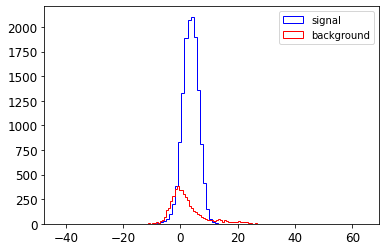

In [270]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sigMidPt[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal")
plt.hist(Fisher.decision_function(Test_bkgMidPt[VarNames[1:]]),bins=100,histtype="step", color="red", label="background")
plt.legend(loc='upper right')
plt.show()

In [271]:
#confusion_matrix(y_Train, y_Train_pred, labels=[1,0])

In [272]:
from sklearn.model_selection import cross_val_predict
y_scoresLowPt = cross_val_predict(Fisher, X_TrainLowPt, y_TrainLowPt, cv=3,
                             method="decision_function")
print(y_scoresLowPt)

[5.43874083 6.07981155 4.81102566 ... 4.94046318 5.82397882 6.28143312]


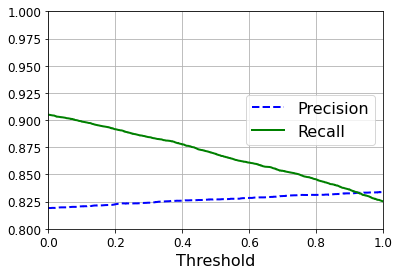

<Figure size 576x288 with 0 Axes>

In [273]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_TestMidPt, Fisher.decision_function(X_TestMidPt))

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)
    plt.axis([0,1, 0.8, 1])        
    plt.grid(True)         
    plt.figure(figsize=(8, 4))                                                                 

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
#print(precisions)
#precisions.info()

In [274]:
Fisher.decision_function(X_TestLowPt)

array([ 1.76624359, -1.40256843,  2.78483201, ..., -7.42168213,
       -8.8094278 ,  4.71695729])

In [275]:
Fisher.predict(X_TestLowPt)

array([1, 0, 1, ..., 0, 0, 1])

In [276]:
import pandas as pd
test=pd.DataFrame(recalls)
test= pd.concat([test, pd.DataFrame(precisions)], axis=1)
test= pd.concat([test, pd.DataFrame(thresholds)], axis=1)
test.describe()
#PandaPionDF_PtBins=PandaPionDF[(PandaPionDF.fTreeVariablePtTrigger>PtMin) & (PandaPionDF.fTreeVariablePtTrigger<PtMax)]

,0,0,0
count,18568.000000,18568.000000,18567.000000
mean,0.543294,0.749250,3.129596
std,0.319052,0.169420,4.088893
min,0.000000,0.014663,-42.159267
25%,0.261835,0.758244,0.836786
50%,0.565627,0.812276,3.073522
75%,0.841987,0.834410,5.193477
max,1.000000,1.000000,64.106052


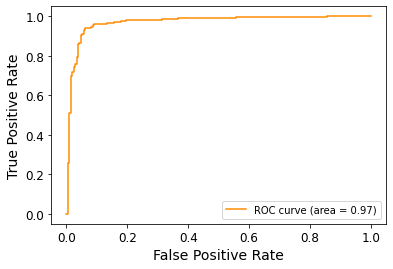

In [277]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_TestHighPt, Fisher.decision_function(X_TestHighPt))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [278]:
#test
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import sklearn.discriminant_analysis as DA
FisherLowPt=DA.LinearDiscriminantAnalysis()
FisherLowPt.fit(X_TrainLowPt,y_TrainLowPt)
PrecLowPtbis = precision_score(y_TestLowPt, FisherLowPt.predict(X_TestLowPt))
RecallLowPtbis = recall_score(y_TestLowPt, FisherLowPt.predict(X_TestLowPt))
print(PrecLowPtbis,RecallLowPtbis)

0.9046405617373086 0.9998435348604331


# Default method 1

In [279]:
def PIDMethod(treePion, method):
  PandaPionDF_DM1=treePion.pandas.df(["fTreeVariablePDGCodeTrigger", "fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])
  PandaPionDF_DM1.loc[(PandaPionDF_DM1['fTreeVariablePDGCodeTrigger'] !=0),  'fTreeVariablePDGCodeTrigger'] = 0
  PandaPionDF_DM1.loc[(abs(PandaPionDF_DM1['fTreeVariableNSigmaTPCPion']) <= 3) & (PandaPionDF_DM1['fTreeVariableNSigmaTOFPion'] ==-999) , 'fTreeVariablePDGCodeTrigger'] = 1   
  if (method ==1):
   PandaPionDF_DM1.loc[(abs(PandaPionDF_DM1['fTreeVariableNSigmaTPCPion']) <= 3) & (abs(PandaPionDF_DM1['fTreeVariableNSigmaTOFPion']) <=3 ) , 'fTreeVariablePDGCodeTrigger'] = 1
  if (method==2):
   PandaPionDF_DM1.loc[((abs(PandaPionDF_DM1['fTreeVariableNSigmaTPCPion'])**2 + abs(PandaPionDF_DM1['fTreeVariableNSigmaTOFPion'])**2 )<= 9) & (abs(PandaPionDF_DM1['fTreeVariableNSigmaTOFPion']) !=-999 ) , 'fTreeVariablePDGCodeTrigger'] = 1
  return PandaPionDF_DM1
 

In [280]:
PandaPionDF_DM1 = PIDMethod(treePion, 2)

In [281]:
PandaPionDF_DM1_LowPt = AllPtBins(0.5, 1, PandaPionDF_DM1)
PandaPionDF_DM1_MidPt = AllPtBins(1, 3, PandaPionDF_DM1)
PandaPionDF_DM1_HighPt = AllPtBins(3, 4, PandaPionDF_DM1)

In [282]:
def PredictDM1(PandaPionDFTry1, PandaPionDF_DM1, NTrain):
  Test_Sample_TrueY=PandaPionDFTry1[NTrain:]
  Test_Sample_DM1=PandaPionDF_DM1[NTrain:]
  y_True=Test_Sample_TrueY["fTreeVariablePDGCodeTrigger"]
  y_DM1=Test_Sample_DM1["fTreeVariablePDGCodeTrigger"]
  return y_True, y_DM1

In [283]:
from sklearn.metrics import roc_curve, auc
y_TrueLowPt, y_DM1LowPt = PredictDM1(PandaPionDF_LowPt, PandaPionDF_DM1_LowPt, int(0.8*len(PandaPionDF_LowPt.index)))
accLowPt, precLowPt, recAllPt = modeleval(y_DM1LowPt, y_TrueLowPt)
fpr, tpr, _ = roc_curve(y_TrueLowPt, y_DM1LowPt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9323597849634919 0.9575804696003732 0.9635436224809113
0.8562426376715251


In [284]:
y_TrueMidPt, y_DM1MidPt = PredictDM1(PandaPionDF_MidPt, PandaPionDF_DM1_MidPt, int(0.8*len(PandaPionDF_MidPt.index)))
accMidPt, precMidPt, recAllPt = modeleval(y_DM1MidPt, y_TrueMidPt)
fpr, tpr, _ = roc_curve(y_TrueMidPt, y_DM1MidPt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8672914310335541 0.8729351129906171 0.9606602675974404
0.780641660278471


In [285]:
y_TrueHighPt, y_DM1HighPt = PredictDM1(PandaPionDF_HighPt, PandaPionDF_DM1_HighPt, int(0.8*len(PandaPionDF_HighPt.index)))
accHighPt, precHighPt, recAllPt = modeleval(y_DM1HighPt, y_TrueHighPt)
fpr, tpr, _ = roc_curve(y_TrueHighPt, y_DM1HighPt)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8813813813813813 0.8951781970649895 0.9364035087719298
0.8491541353383457


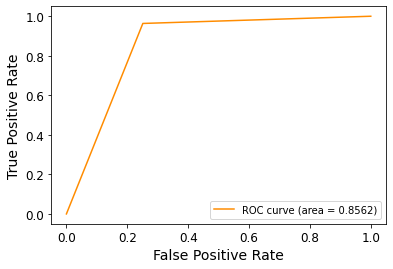

In [286]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_TrueLowPt, y_DM1LowPt)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# BDT

In [287]:
X_Train = X_TrainHighPt
y_Train = y_TrainHighPt
X_Test = X_TestHighPt
y_Test = y_TestHighPt

In [288]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [289]:
#tree.plot_tree(clf)

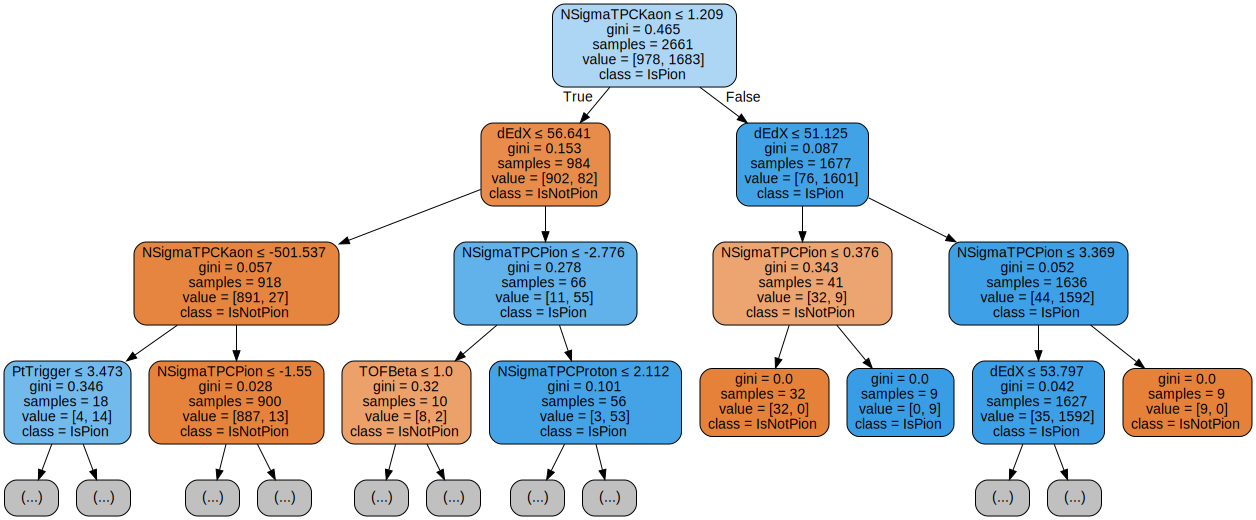

In [290]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3,
                        feature_names=FeatureNames,  
                        class_names=ClassNames,  
                        filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("/content/gdrive/My Drive/FinalExamML/treeSchema")
graph 
#save_fig("/content/gdrive/My Drive/FinalExamML/treeSchema")

In [291]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
y_Train_predBDT=clf.predict(X_Train)
y_Test_predBDT=clf.predict(X_Test)
print(accuracy_score(y_Test, y_Test_predBDT))
print(accuracy_score(y_Train, y_Train_predBDT))


0.9474474474474475
1.0


In [292]:
acc, prec, rec = modeleval(y_Test_predBDT, y_Test)

0.9474474474474475 0.9646799116997793 0.9583333333333334


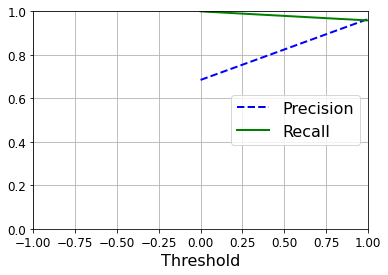

<Figure size 576x288 with 0 Axes>

In [293]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_Test, y_Test_predBDT)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)
    plt.axis([-1, 1, 0, 1])        
    plt.grid(True)         
    plt.figure(figsize=(8, 4))                                                                 

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

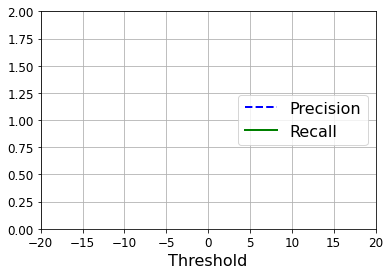

<Figure size 576x288 with 0 Axes>

In [294]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_Train, y_Train_predBDT)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)
    plt.axis([-20, 20, 0, 2])        
    plt.grid(True)         
    plt.figure(figsize=(8, 4))                                                                 

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [295]:
print(precision_score(y_Test, y_Test_predBDT))
print(recall_score(y_Test, y_Test_predBDT))

0.9646799116997793
0.9583333333333334


In [296]:
print(precision_score(y_Train, y_Train_predBDT))
print(recall_score(y_Train, y_Train_predBDT))

1.0
1.0


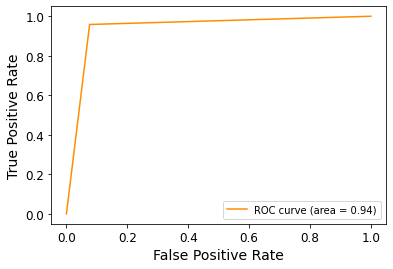

In [297]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, y_Test_predBDT)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#Application to data

In [298]:
#filePionData=uproot.open("/content/gdrive/My Drive/AnalysisResultsPionsData.root")
filePionData=uproot.open("/content/gdrive/My Drive/AnalysisResults2016k_Pions_5runs.root")
dirPionData=filePionData["MyTaskPions"]
treePionData=dirPionData["fSignalTree"]
PandaPionDDF=treePionData.pandas.df(["fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])
PandaPionDDF_IsPion=treePionData.pandas.df(["fTreeVariablePDGCodeTrigger"])
PandaPionDDFClassified=treePionData.pandas.df(["fTreeVariablePDGCodeTrigger","fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFBeta", "fTreeVariablePtTrigger", "fTreeVariablePtot"])
PandaPionDDF = PandaPionDDF[PandaPionDDF.index < 300000]
PandaPionDDF_IsPion = PandaPionDDF_IsPion[PandaPionDDF_IsPion.index < 300000]
PandaPionDDFClassified = PandaPionDDFClassified[PandaPionDDFClassified.index < 300000]

In [299]:
PandaPionDDFClassified.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fTreeVariablePDGCodeTrigger   300000 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    300000 non-null  float64
 2   fTreeVariableNSigmaTOFProton  300000 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    300000 non-null  float64
 4   fTreeVariableNSigmaTPCPion    300000 non-null  float64
 5   fTreeVariableNSigmaTPCProton  300000 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    300000 non-null  float64
 7   fTreeVariabledEdX             300000 non-null  float64
 8   fTreeVariableTOFBeta          300000 non-null  float64
 9   fTreeVariablePtTrigger        300000 non-null  float64
 10  fTreeVariablePtot             300000 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 26.3 MB


In [300]:
def DataPtBins(PandaPionDDF, PtMin, PtMax):
 PandaPionDDF_PtBin=PandaPionDDF[(PandaPionDDF.fTreeVariablePtTrigger>PtMin) & (PandaPionDDF.fTreeVariablePtTrigger<PtMax)]
 PandaPionDDFClassified_PtBin=PandaPionDDFClassified[(PandaPionDDFClassified.fTreeVariablePtTrigger>PtMin) & (PandaPionDDFClassified.fTreeVariablePtTrigger<PtMax)]
 return PandaPionDDF_PtBin, PandaPionDDFClassified_PtBin

In [301]:
#PandaPionDDF_LowPt, PandaPionDDF_IsPion_LowPt, PandaPionDDFClassified_LowPt = DataPtBins(treePionData, 0.5, 1)
#PandaPionDDF_MidPt, PandaPionDDF_IsPion_MidPt, PandaPionDDFClassified_MidPt = DataPtBins(treePionData, 0.5, 1)
#PandaPionDDF_HighPt, PandaPionDDF_IsPion_HighPt, PandaPionDDFClassified_HighPt = DataPtBins(treePionData, 0.5, 1)
PandaPionDDF_LowPt, PandaPionDDFClassified_LowPt = DataPtBins(PandaPionDDF, 0.5, 1)
PandaPionDDF_MidPt, PandaPionDDFClassified_MidPt = DataPtBins(PandaPionDDF, 1, 3)
PandaPionDDF_HighPt, PandaPionDDFClassified_HighPt = DataPtBins(PandaPionDDF, 3, 4)
#

In [302]:
PandaPionDDF_HighPt.head()
#PandaPionDDF_IsPion.describe()

,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFBeta,fTreeVariablePtTrigger,fTreeVariablePtot
entry,,,,,,,,,,
75,-0.837886,-4.302474,-1.756048,-0.238075,1.986638,1.762627,58.53125,1.009780,3.047660,2.877836
357,-999.000000,-999.000000,-999.000000,0.204714,4.955480,3.708819,62.18750,-999.000000,3.185363,4.138551
424,-0.735121,-4.744356,-1.791263,1.270840,5.540550,4.542890,66.87500,1.004382,3.951135,3.937879
585,3.994156,-0.329447,2.854990,-3.256894,0.254342,-0.603130,50.53125,0.971899,3.724849,3.818446
943,1.482492,-3.028872,0.294461,-0.322152,4.281124,3.130680,60.40625,0.990588,3.220525,3.970074


In [303]:
#PandaPionDDF.info()

classify data

In [307]:
def DataClassifier(X_Train, y_Train, method, PandaPionDDF, PandaPionDDFClassified):
  #repeat the training
  if (method=='BDT'):
   from sklearn import tree
   clf=tree.DecisionTreeClassifier()
   clf.fit(X_Train,y_Train)
   y_Data_predBDT=clf.predict(PandaPionDDF)
   yDF = pd.DataFrame(y_Data_predBDT)
   yDF= yDF.set_index(PandaPionDDF.index)
   PandaPionDDFClassified= pd.concat([PandaPionDDF, pd.DataFrame(y_Data_predBDT)], axis=1, join='inner')
   PandaPionDDFClassified = PandaPionDDFClassified.rename(columns={0: 'IsAPion'})
  if (method=='Fisher'):
   import sklearn.discriminant_analysis as DA
   Fisher=DA.LinearDiscriminantAnalysis()
   Fisher.fit(X_Train,y_Train)
   y_Data_predBDT=Fisher.predict(PandaPionDDF)
   yDF = pd.DataFrame(y_Data_predBDT)
   yDF= yDF.set_index(PandaPionDDF.index)
   PandaPionDDFClassified= pd.concat([PandaPionDDF, pd.DataFrame(y_Data_predBDT)], axis=1, join='inner')
   PandaPionDDFClassified = PandaPionDDFClassified.rename(columns={0: 'IsAPion'})
  if ((method=='DM1') | (method=='DM2')):
   PandaPionDDFClassified.loc[(PandaPionDDFClassified['fTreeVariablePDGCodeTrigger'] !=0),  'fTreeVariablePDGCodeTrigger'] = 0
   PandaPionDDFClassified.loc[(abs(PandaPionDDFClassified['fTreeVariableNSigmaTPCPion']) <= 3) & (PandaPionDDFClassified['fTreeVariableNSigmaTOFPion'] ==-999) , 'fTreeVariablePDGCodeTrigger'] = 1   
   if (method=='DM1'):
    PandaPionDDFClassified.loc[(abs(PandaPionDDFClassified['fTreeVariableNSigmaTPCPion']) <= 3) & (abs(PandaPionDDFClassified['fTreeVariableNSigmaTOFPion']) <=3 ) , 'fTreeVariablePDGCodeTrigger'] = 1
   if (method=='DM2'):
    PandaPionDDFClassified.loc[((abs(PandaPionDDFClassified['fTreeVariableNSigmaTPCPion'])**2 + abs(PandaPionDDFClassified['fTreeVariableNSigmaTOFPion'])**2 )<= 9) & (abs(PandaPionDDFClassified['fTreeVariableNSigmaTOFPion']) !=-999 ) , 'fTreeVariablePDGCodeTrigger'] = 1
   PandaPionDDFClassified = PandaPionDDFClassified.rename(columns={'fTreeVariablePDGCodeTrigger': 'IsAPion'})
   yDF=PandaPionDDFClassified  
  PandaPionDDF_Pions=PandaPionDDFClassified[(PandaPionDDFClassified.IsAPion==1)]
  return PandaPionDDFClassified, PandaPionDDF_Pions, yDF

In [308]:
PandaPionDDFClassifiedLowPt, PandaPionDDF_PionsLowPt, yDF_LowPt = DataClassifier(X_TrainLowPt, y_TrainLowPt, 'DM2', PandaPionDDF_LowPt, PandaPionDDFClassified_LowPt)
PandaPionDDFClassifiedMidPt, PandaPionDDF_PionsMidPt, yDF_MidPt = DataClassifier(X_TrainMidPt, y_TrainMidPt, 'DM2', PandaPionDDF_MidPt, PandaPionDDFClassified_MidPt)
PandaPionDDFClassifiedHighPt, PandaPionDDF_PionsHighPt, yDF_HighPt = DataClassifier(X_TrainHighPt, y_TrainHighPt, 'DM2', PandaPionDDF_HighPt, PandaPionDDFClassified_HighPt)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [309]:
#yDF_LowPt.head(10)

In [310]:
#PandaPionDDF_LowPt.head(10)

In [311]:
#PandaPionDDF_LowPt.index

In [312]:
#yDF_LowPt.index

In [313]:
#PandaPionDDF_LowPt.info()
#yDF_LowPt = yDF_LowPt.set_index(PandaPionDDF_LowPt.index)

In [314]:
#yDF_LowPt.index

In [315]:
#yDF_LowPt.head(10)

In [316]:
#PandaPionDDF_PionsLowPt.head(30)

In [317]:
#PandaPionDDFClassifiedLowPt.info()

In [318]:
PandaPionDDF_Pions = pd.concat([PandaPionDDF_PionsLowPt, PandaPionDDF_PionsMidPt, PandaPionDDF_PionsHighPt], axis=0)
PandaPionDDFClassified_Pions = pd.concat([PandaPionDDFClassifiedLowPt, PandaPionDDFClassifiedMidPt, PandaPionDDFClassifiedHighPt], axis=0)

In [319]:
#PandaPionDDFRed_Pions = PandaPionDDF_Pions[PandaPionDDF_Pions.index < 3000]

In [320]:
#PandaPionDDFRed_Pions.info()

In [321]:
#PandaPionDDF_Pions.describe()

In [322]:
#PandaPionDDF_HighPt.info()

In [323]:
PandaPionDDF_Pions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121245 entries, 2 to 299705
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   IsAPion                       121245 non-null  int32  
 1   fTreeVariableNSigmaTOFPion    121245 non-null  float64
 2   fTreeVariableNSigmaTOFProton  121245 non-null  float64
 3   fTreeVariableNSigmaTOFKaon    121245 non-null  float64
 4   fTreeVariableNSigmaTPCPion    121245 non-null  float64
 5   fTreeVariableNSigmaTPCProton  121245 non-null  float64
 6   fTreeVariableNSigmaTPCKaon    121245 non-null  float64
 7   fTreeVariabledEdX             121245 non-null  float64
 8   fTreeVariableTOFBeta          121245 non-null  float64
 9   fTreeVariablePtTrigger        121245 non-null  float64
 10  fTreeVariablePtot             121245 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 10.6 MB


In [324]:
#y_Data_predBDT=clf.predict(PandaPionDDF)

In [325]:
#y_Data_predBDT

In [326]:
#PandaPionDDFClassified["IsAPion"] = PandaPionDDFClassified["fTreeVariabledEdX"]

In [327]:
#PandaPionDDFClassified.describe()

In [328]:
#import pandas as pd
#PandaPionDDFClassified= pd.concat([PandaPionDDF, pd.DataFrame(y_Data_predBDT)], axis=1)

In [329]:
#PandaPionDDFClassified.info()

In [330]:
#PandaPionDDFClassified = PandaPionDDFClassified.rename(columns={0: 'IsAPion'})

In [331]:
#PandaPionDDFClassified.describe()

In [332]:
#PandaPionDDF_Pions=PandaPionDDFClassified[(PandaPionDDFClassified.IsAPion==1)]

No handles with labels found to put in legend.


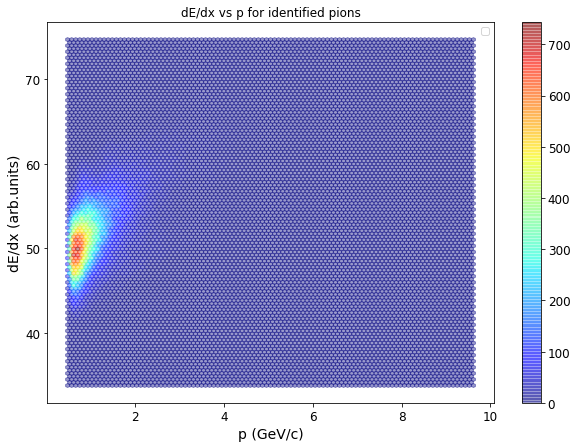

In [362]:
import matplotlib.pyplot as plt
#plt.xlabel('p (GeV/c)')
#fig = plt.figure()
#ax = fig.add_subplot(111)
fig = plt.figure(figsize=(20,30))
ax1 = fig.add_subplot(111)
ax = PandaPionDDF_Pions.plot(kind="hexbin", x="fTreeVariablePtot", y="fTreeVariabledEdX", alpha=0.4,
#    s=PandaPionDDF_Pions["fTreeVariableNSigmaTPCPion"], label="Stopping power", figsize=(10,7),
     label="Stopping power", title = 'dE/dx vs p for identified pions', figsize=(10,7),logx=False,
     cmap=plt.get_cmap("jet"), colorbar=True, ax=ax1)
#fig.colorbar(ax)
#cax=ax.scatter()
#plt.colorbar()
#     cmap=plt.get_cmap("jet"), colorbar=True)
ax.set_xlabel('p (GeV/c)')
ax.set_ylabel('dE/dx (arb.units)')
plt.legend()
plt.show()
#c="IsAPion",

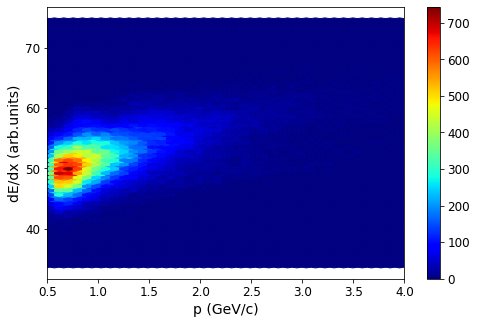

In [377]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax = PandaPionDDF_Pions.plot.hexbin( x="fTreeVariablePtot", y="fTreeVariabledEdX", ax=ax1, cmap=plt.get_cmap("jet"))
ax.set_xlabel('p (GeV/c)')
ax.set_ylabel('dE/dx (arb.units)')
ax.set_xlim(0.5, 4)
plt.savefig('dEdXDM2')


In [335]:
import matplotlib.pyplot as plt
#PandaPionDDFClassified.plot(kind="scatter", x="fTreeVariablePtot", y="fTreeVariabledEdX", alpha=0.4,
#    s=PandaPionDDF_Pions["fTreeVariableNSigmaTPCPion"], label="Stopping power", figsize=(10,7),
 #    label="Stopping power", figsize=(10,7),logx=True,
 #    c="IsAPion", cmap=plt.get_cmap("jet"), colorbar=True)
#     cmap=plt.get_cmap("jet"), colorbar=True)
#plt.legend()

In [ ]:
y_Data_predFisher=Fisher.predict(PandaPionDDF)
PandaPionDDFFisherClassified= pd.concat([PandaPionDDF, pd.DataFrame(y_Data_predFisher)], axis=1)
PandaPionDDFFisherClassified = PandaPionDDFClassified.rename(columns={0: 'IsAPion'})
PandaPionDDFFisher_Pions=PandaPionDDFFisherClassified[(PandaPionDDFFisherClassified.IsAPion==1)]

In [ ]:
import matplotlib.pyplot as plt
PandaPionDDFFisher_Pions.plot(kind="scatter", x="fTreeVariablePtot", y="fTreeVariabledEdX", alpha=0.4,
#    s=PandaPionDDF_Pions["fTreeVariableNSigmaTPCPion"], label="Stopping power", figsize=(10,7),
     label="Stopping power", figsize=(10,7),logx=True,
     c="IsAPion", cmap=plt.get_cmap("jet"), colorbar=True)
#     cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()